# UV pulse duration throughout experiment

The experiment was acquired with Micro-Manager using the [htSMLM plugin](https://github.com/jdeschamps/htSMLM), which includes an automated UV power ramping algorithm for SMLM. The UV power is adjusted by changing the pulse length of the laser trigger generated by MicroFPGA. The values of the pulse duration are extracted from the metadata saved with the images.

In [1]:
import os
import os.path as op
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# define some matplotlib style for all figures
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

In [2]:
path = op.join('data/uv/02_sCMOS_Active_30ms_2D_1_MMStack_Pos0_metadata.txt')

with open(path) as f:
    lines = f.readlines()[0:]
    vals = np.zeros((len(lines),1))
    
    for i, l in enumerate(lines):
        s = l.split('\n')[0]
        
        if len(s) > 1:
            vals[i] = float(s)

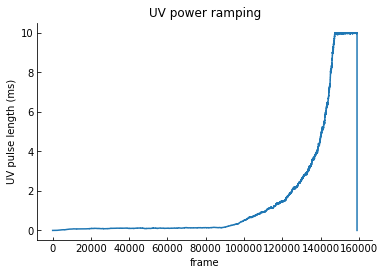

In [3]:
plt.plot([i for i in range(len(vals))], vals / 1_000)

plt.title('UV power ramping')
plt.xlabel('frame')
plt.ylabel('UV pulse length (ms)')

dir_path = 'figs'
if not os.path.isdir(dir_path): os.mkdir(dir_path)
plt.savefig(op.join(dir_path,'fig_us_pulsing.eps'), format='eps')